# Проект по оценке путей увеличения выручки крупного интернет-магазина.  
Задачи исследования:
- приоретизация гипотез, составленных совместно с отделом маркетинга
- оценка результатов А/В-теста: оценить динамику среднего чека и выручки по группам, посчитать статистическую значимость раличий по группам на "сырых" данных и на данных, очищенных от аномальных пользователей.
- принять решение об остановке или продолжении теста, зафиксировать победу одной из групп или отсутствие различий между ними.

## Оглавление
- [Приоретизация гипотез](#priority)
- [Подготовка даннных](#preparing)
- [Кумулятивная выручка по группам](#revenue)
- [Средний чек по группам](#check)
- [Относительное изменение кумулятивного среднего чека группы B к группе A](#graph1)
- [Кумулятивное среднее количество заказов на посетителя по группам](#graph2)
- [Относительное изменение кумулятивного среднего количества заказов В к А](#graph3)
- [Число заказов пользователей](#orders_cnt)
- [Стоимость заказов пользователей](#orders_total)
- [Расчет 95-й и 99-й перцентиля стоимости заказов.](#orders_cost)
- [Расчеты статистической значимости различий по "сырым" данным](#cnt_raw)
- [Расчеты статистической значимости различий по очищенным данным](#cnt_clean)
- [Выводы](#conclusion)

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

<a id='priority'></a>
## Приоретизация гипотез

In [2]:
# Загрузка данных по гипотезам
hypothesis = pd.read_csv('c:/projects/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
# Убираем заглавные буквы в заголовках таблицы
pd.options.display.max_colwidth = 150
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# Расчет ICE для приоритизации гипотез
ice = hypothesis
ice['ice'] = round(ice['impact'] * ice['confidence'] / ice['efforts'], 2)
display(ice[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [5]:
# Расчет RICE для приоритизации гипотез
rice = hypothesis
rice['rice'] = round(rice['reach'] * rice['impact'] * rice['confidence'] / rice['efforts'], 2)
display(rice[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Выводы по приоритезации гипотез**  
ТОП 5 гипотез: 8, 0, 7, 6, 2.  
Основное отличие фреймворков RICE и ICE в том, что метод RICE скоринга предполагает ещё и оценку охвата, т.е. предполагаемой целевой аудитории проекта.  
При переходе от оценки ICE на оценку RICE на первое и второе место попали гипотезы №7 (Добавить форму подписки на все основные страницы) и № 2 (Добавить блоки рекомендаций товаров на сайт...) из-за высокого значения параметра охвата (reach), 10 и 8 соответственно. Гипотеза №0 о добавлении двух новых каналов привлечения трафика осталась в тройке лидеров не смотря на сравнительно небольшое значение параметра охвата (3) благодаря высоким значениям влияния (10) и уверенности в оценке (8).


## Анализ A/B-теста

<a id='preparing'></a>
### Подготовка данных

In [6]:
# Загрузка файла с заказами
orders = pd.read_csv('c:/projects/datasets/orders.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
# Убираем заглавные буквы в названиях столбцов, преобразовываем столбец с датами в тип данных дата
orders.columns = orders.columns.str.lower()
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [8]:
# Проверка на пропуски orders
print(orders.isna().sum())

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64


In [9]:
# Проверка на дубликаты orders
print(orders.duplicated().sum())

0


In [10]:
# Первые 5 строк orders
orders.head(5)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
# Загрузка файла с пользователями
visitors = pd.read_csv('c:/projects/datasets/visitors.csv')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
# Преобразовываем столбец с датами в нужный тип.
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
# Проверка visitors на пропуски
print(visitors.isna().sum())

date        0
group       0
visitors    0
dtype: int64


In [14]:
# Проверка visitors на дубликаты
print(visitors.duplicated().sum())

0


In [15]:
# Первые 5 строк visitors
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
# Число групп в тесте.
print('Число групп в А/В тесте:', orders['group'].nunique())
print('Дата начала теста:', (pd.to_datetime(orders['date'])).dt.date.min())
print('Дата окончания теста:', (pd.to_datetime(orders['date'])).dt.date.max())
print('Число пользователей в группе А:', orders[orders['group'] == 'A']['visitorid'].nunique())
print('Число пользователей в группе В:', orders[orders['group'] == 'B']['visitorid'].nunique())
print('В группе В больше пользователей по сравнению с А на:', round(
    ((orders[orders['group'] == 'B']['visitorid'].nunique()) / (
        orders[orders['group'] == 'A']['visitorid'].nunique()
    ) -1)*100
    ), '%'
)


Число групп в А/В тесте: 2
Дата начала теста: 2019-08-01
Дата окончания теста: 2019-08-31
Число пользователей в группе А: 503
Число пользователей в группе В: 586
В группе В больше пользователей по сравнению с А на: 17 %


- в тесте 2 группы, это парный тест
- тест проводился полный месяц, август 2019 года
- в группе `В` пользователей на 17% больше пользователей, по сравнению с группой `А`. Это может повлиять на показатели тестирования, предположительно на относительные показатели, такие как средний чек повлиять не должно.


In [17]:
# ID пользователей из группы А
users_id_a = orders[orders['group'] == 'A']['visitorid'].unique()
# То же для В
users_id_b = orders[orders['group'] == 'B']['visitorid'].unique()
# проверка на присутствие пользователя в обеих группах
counter = 0
for i in range(len(users_id_a)):
    if users_id_a[i] in users_id_b:
        counter+=1
if counter > 0:
    print('Число пользователей, присутствующих в обеих группах:', counter)
else:
    print('Нет пользователей, присутствующих в обеих группах')

Число пользователей, присутствующих в обеих группах: 58


Найдео 58 пользователей, которые оказались в обеих группах. Таких пользователей лучше удалить, так как они видели оба варианта дизайна продукта и мы не можем оценить какой из версий сайта вызвано их потребительское поведение. От 1089 пользователей суммарно это 5,3 %.

In [18]:
# Перечень ID пользователей, присутствующих в обеих группах.
user_id_in_ab = []
for i in range(len(users_id_a)):
    if users_id_a[i] in users_id_b:
        user_id_in_ab.append(users_id_a[i])
# очистка таблицы orders
orders = orders[orders['visitorid'].isin(user_id_in_ab) == False]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [19]:
# Расчет кумулятивных данных

# Массив уникальных значений пар дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()
# Агреггированные кумулятивные данные для закзов.
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# Аналогично для посетителей
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


**Выводы по предварительной подготовке данных**  
Загружены данные по посетителям и заказам, даты преобразованы к нужному типу данных, пропусков и дубликатов нет. Удалены пользователи, которые оказались в обеих группах. 
Рассчитаны кумулятивные данные для дальнейшего анализа.

<a id='revenue'></a>
### Динамика кумулятивной выручки по группам

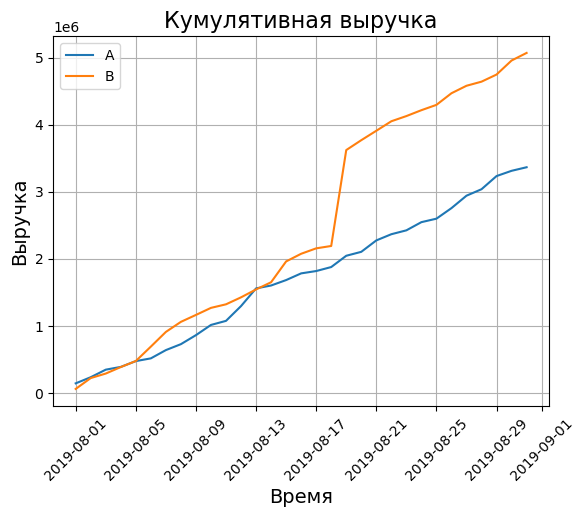

In [20]:
# кумулятивные заказы и выручка по группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
# кумулятивные заказы и выручка по группе В
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]
# график кумулятивной выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
# график кумулятивной выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('Кумулятивная выручка', fontsize=16)
plt.xlabel('Время', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.grid()
plt.xticks(rotation=45)
plt.legend();

**Вывод по графику кумулятивной выручки по группам**  
После 16 дня эксперимента кумулятивная выручка по группе `B` превышает кумулятивную выручку по группе `A`.


<a id='check'></a>
### Динамика кумулятивного среднего чека по группам
<a id='graph1'></a>

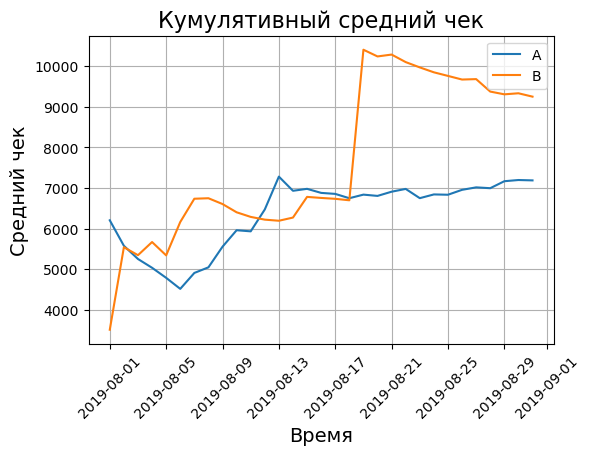

In [21]:
# Графики среднего чека по группам (выручка / число заказов)
plt.figure(figsize=(6, 4))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.title('Кумулятивный средний чек', fontsize=16)
plt.xlabel('Время', fontsize=14)
plt.ylabel('Средний чек', fontsize=14)
plt.grid()
plt.xticks(rotation=45)
plt.legend();

**Вывод по графику кумулятивного среднего чека по группам**  
После 16 дня эксперимента кумулятивный средний чек по группе `B` резко возрастает по сравнению с кумулятивной выручкой по группе `A`. Затем следует небольшой спад. Такой характер изменений может свидетельствовать о наличии аномально больших заказов 17-19 августа 2019 года.

### Относительное изменение кумулятивного среднего чека группы B к группе A.

<a id='graph1'></a>

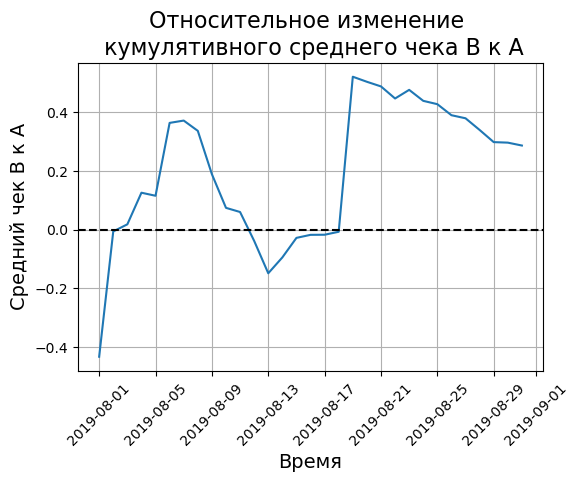

In [22]:
# Объединяем данные
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, 
                                                     left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# Строим график
plt.figure(figsize=(6, 4))
plt.plot(merged_cumulative_revenue['date'],
        (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB']) / (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA']) - 1)
plt.title('Относительное изменение \n кумулятивного среднего чека В к А', fontsize=16)
plt.xlabel('Время', fontsize=14)
plt.ylabel('Средний чек В к А', fontsize=14)
plt.grid()
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--');

**Вывод по графику кумулятивного среднего чека по группам**  
Отношение среднего чек группы `B` к группе `A` снижалось до 13 августа, после 17 августа резкий рост, возможно связанный с аномально большими заказами.

<a id='graph2'></a>
### Зависимость кумулятивного среднего количества заказов на посетителя по группам.
<b id='graph2'></b>

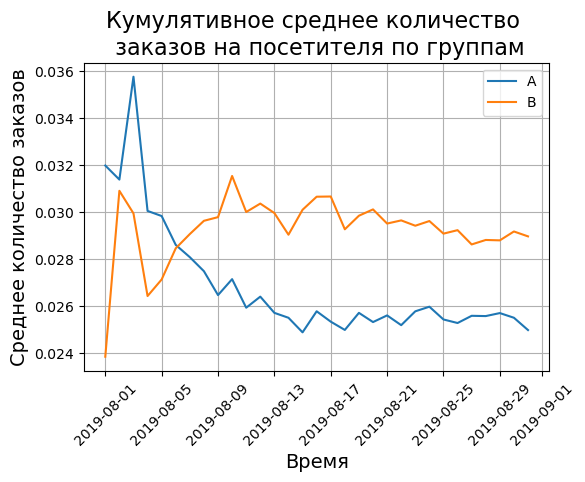

In [23]:
# Кумулятивные заказы и посетители по группе А
cumulative_orders_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'orders', 'visitors']]
# Кумулятивные заказы и посетители по группе B
cumulative_orders_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'orders', 'visitors']]
# График кумулятивного среднего числа заказов на посетителя по группам
plt.figure(figsize=(6, 4))
plt.plot(cumulative_orders_a['date'], cumulative_orders_a['orders'] / cumulative_orders_a['visitors'], label='A')
plt.plot(cumulative_orders_b['date'], cumulative_orders_b['orders'] / cumulative_orders_b['visitors'], label='B')
plt.title('Кумулятивное среднее количество \n заказов на посетителя по группам', fontsize=16)
plt.ylabel('Среднее количество заказов', fontsize=14)
plt.xlabel('Время', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.legend();

**Вывод по графику кумулятивного среднего чека по группам**  
Среднее количество заказов на посетителя стабилизировалось на 10 день эксперимента, количество заказов в группе `B` стабильно выше, чем в группе `A`.

<a id='graph3'></a>
### Зависимость изменения относительного кумулятивного среднего количества заказов на посетителя группы B к группе A.

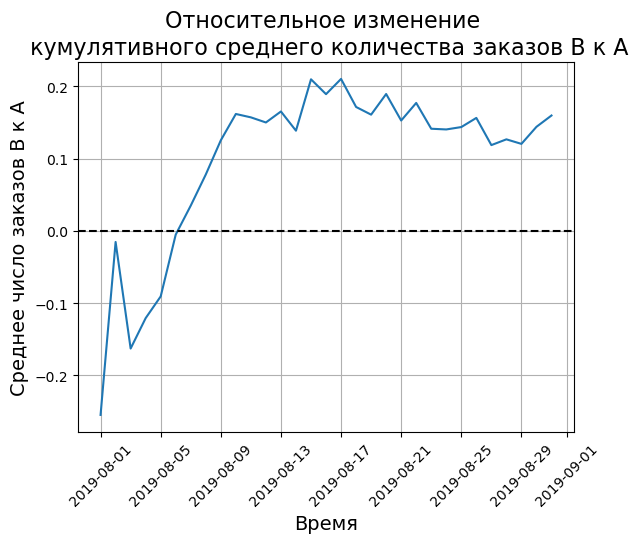

In [24]:
# Объединяем данные
merged_cumulative_orders = cumulative_orders_a.merge(cumulative_orders_b, 
                                                     left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# Строим график
plt.plot(merged_cumulative_orders['date'],
        (merged_cumulative_orders['ordersB']/merged_cumulative_orders['visitorsB']) / (merged_cumulative_orders['ordersA']/merged_cumulative_orders['visitorsA']) - 1)
plt.title('Относительное изменение \n кумулятивного среднего количества заказов В к А', fontsize=16)
plt.xlabel('Время', fontsize=14)
plt.ylabel('Среднее число заказов В к А', fontsize=14)
plt.grid()
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--');

**Вывод по графику кумулятивного среднего количества заказов на посетителя по группам**  
Среднее количество заказов на посетителя стабилизировалось на 10 день эксперимента, далее количество заказов в группе `B` относительно группы `A` стабильно выше нуля.

<a id='orders_cnt'></a>
### Точечный график количества заказов по пользователям.

In [25]:
# Таблица с заказами пользователей.
orders_by_users = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
orders_by_users.columns = ['user_id', 'orders']
orders_by_users = orders_by_users.sort_values(by='orders', ascending=False)
orders_by_users.head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


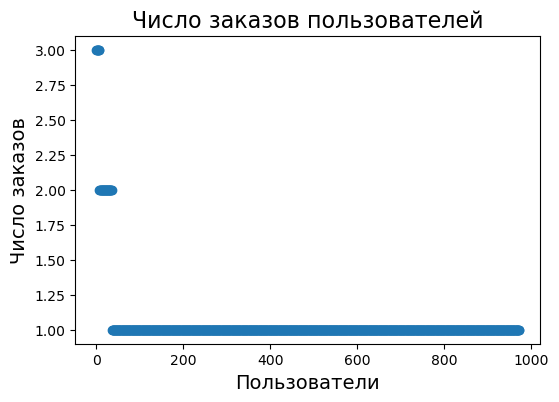

In [26]:
# Точечный график числа заказов пользователей
plt.figure(figsize=(6, 4))
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Число заказов пользователей', fontsize=16)
plt.ylabel('Число заказов', fontsize=14)
plt.xlabel('Пользователи', fontsize=14);

**Вывод по точечному графику числа заказов пользователей**  
Много пользователей с заказами 5 и менее.

<a id='orders'></a>
### Расчет 95-й и 99-й перцентиля количества заказов на пользователя.

In [27]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


**Вывод по расчету персентиля числа заказов пользователей**  
95 % пользователей заказали менее двух заказов. 99 % пользователей сделали менее четырех заказов. Можно выбрать за верхнюю границу 4 заказа и отсеять пользователей, которые сделали более четырех заказов.

<a id='orders_total'></a>
### Точечный график стоимостей заказов.

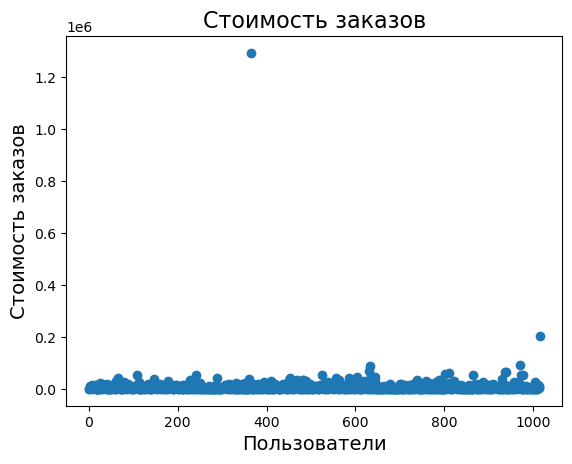

In [28]:
x_values = pd.Series(range(len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов', fontsize=16)
plt.ylabel('Стоимость заказов', fontsize=14)
plt.xlabel('Пользователи', fontsize=14);

**Вывод по точечному графику стоимости заказов**  
Заказов с аномально большой стоимостью немного, точные значения по графику определить сложно, нужно использовать другие способы.

In [29]:
# Топ 10 заказов по стоимости
print(orders.sort_values(by='revenue', ascending=False).head(10))

      transactionid   visitorid       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A
949      1347999392   887908475 2019-08-21    60450     A
940      2420050534  4003628586 2019-08-08    58550     B
131      3163614039  2254586615 2019-08-22    53904     A


Выделяются заказы на 1,3 млн. и 200 тыс.

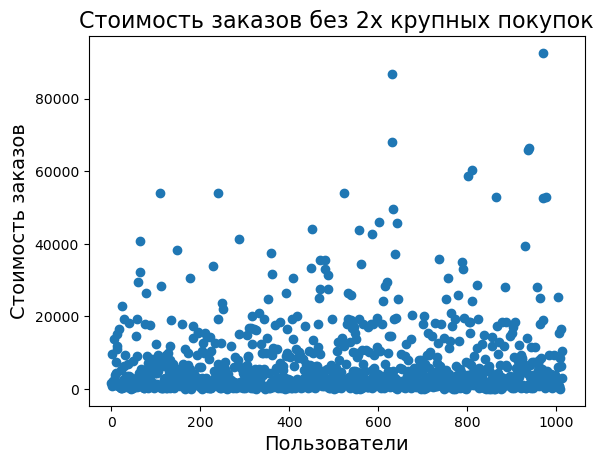

In [30]:
# Точечный график стоимостей заказов без 2х крупных покупок
revenue_cleared = orders[orders['revenue'] < 200000]
x_values = pd.Series(range(len(revenue_cleared)))
plt.scatter(x_values, revenue_cleared['revenue'])
plt.title('Стоимость заказов без 2х крупных покупок', fontsize=16)
plt.ylabel('Стоимость заказов', fontsize=14)
plt.xlabel('Пользователи', fontsize=14);

График стал более информативным, основная масса заказов менее 20 000.

<a id='orders_cost'></a>
<b id='cost'></b>
### Расчет 95-й и 99-й перцентиля стоимости заказов.

In [31]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


**Вывод по расчету персентиля стоимости заказов**  
95 % заказов на сумму менее 27 000. 99 % заказов со стоимостью менее 58 904. Можно выбрать за верхнюю границу 58 904 и отсеять более дорогие заказы.

<a id='cnt_raw'></a>
### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.  
- Нулевая гипотеза: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем количестве заказов между группами есть.

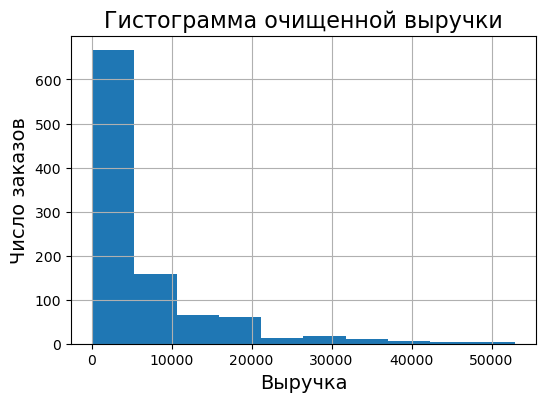

In [32]:
# Выручка за исключением аномально больших заказов
revenue_filtered = orders[orders['revenue'] < (np.percentile(orders['revenue'], [99])[0])]['revenue']
# Гистограмма очищенной выручки
plt.figure(figsize=(6, 4))
revenue_filtered.hist()
plt.title('Гистограмма очищенной выручки', fontsize=16)
plt.ylabel('Число заказов', fontsize=14)
plt.xlabel('Выручка', fontsize=14);

In [33]:
# Статистика по очищенной выручке
revenue_filtered.describe()

count     1004.000000
mean      6251.450199
std       8330.227525
min         50.000000
25%       1190.000000
50%       2913.500000
75%       7867.500000
max      52900.000000
Name: revenue, dtype: float64

Судя по гистограмме и рассчитанной статистике распределение выручки далеко от нормального, например среднее значение  6251, а медиана 2914, то есть медиана смещена относительно среднего. Поэтому целесообразно выбрать для проверки гипотез критерий Манна-Уитни, подходящий для не нормальных распределений, поскольку он не параметрический, а работает с рангами.

In [34]:
# Расчет статистической значимости различия в среднем количестве заказов между группами.
# для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов в переменных.
orders_by_user_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_user_a.columns = ['user_id', 'orders']

orders_by_user_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_user_b.columns = ['user_id', 'orders']
# переменные с пользователями из разных групп и их заказами, кто ничего не заказал, соответственно - 0
sample_a = pd.concat(
    [
        orders_by_user_a['orders'],
        pd.Series(
            0,
            index=np.arange(
#                data['visitors_per_date_a'].sum() - len(orders_by_user_a['orders'])
                (visitors[visitors['group'] == 'A']['visitors']).sum() - len(orders_by_user_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_user_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                (visitors[visitors['group'] == 'B']['visitors']).sum() - len(orders_by_user_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# расчет статистики
print('p-value:', ("{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1])))
print('Относительная разница между В и А:', ("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1)))

p-value: 0.011
Относительная разница между В и А: 0.160


**Вывод по расчету статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**  
Первое число p-value = 0,011 меньше, чем 0,05. Следовательно отвергаем нулевую гипотезу о том, что статистически значимых различий по "сырым" в среднем числе заказов между группами нет. Различия имеются.  
Относительный выигрыш группы `B` по "сырым данным составлеяет 16 %.


### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.  
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная: различия в среднем чеке между группами есть.

In [35]:
# расчет статистики
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие между группами В и А:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.829
Относительное различие между группами В и А: 0.287


**Вывод по расчету статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.**  
Первое число p-value = 0,829 значительно больше, чем 0,05. Следовательно нет причин отвергать нулевую гипотезу о том, что статистически значимых различий по "сырым" данным в среднем чеке между группами нет.   
При этом средний чек группы `B` по "сырым значительно выше чека группы `A`, на 28,7 %.  
Возможно это связано с аномально большими заказами.

<a id='cnt_clean'></a>
### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.  
- Нулевая гипотеза: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем количестве заказов между группами есть.

Примем за аномальных пользователей, которые:
- [сделали более 4 заказов](#orders)
- [совершили заказ дороже 58 904](#cost)

In [36]:
# отбор аномальных пользователей
users_with_many_oders = pd.concat(
    [
        orders_by_user_a[orders_by_user_a['orders'] > (np.percentile(orders_by_users['orders'], [99])[0])]['user_id'],
        orders_by_user_b[orders_by_user_b['orders'] > (np.percentile(orders_by_users['orders'], [99])[0])]['user_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > (np.percentile(orders['revenue'], [99])[0])]['visitorid']
abnormal_users = (
    pd.concat([users_with_many_oders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
abnormal_users.shape[0]

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64


16

In [37]:
# Доля аномальных пользователей
round(abnormal_users.shape[0] / orders['visitorid'].nunique() * 100, 2)

1.64

Исключаем из расчетов 1,64 % аномальных пользователей.

In [38]:
# Расчет статистической значимости различий в среднем количестве заказов между группами теста по очищенным данным.

# Очищенная группа А
sample_filtered_a = pd.concat(
    [
        orders_by_user_a[
            np.logical_not(orders_by_user_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                (visitors[visitors['group'] == 'A']['visitors']).sum() - len(orders_by_user_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# Очищенная группа В
sample_filtered_b = pd.concat(
    [
        orders_by_user_b[
            np.logical_not(orders_by_user_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                (visitors[visitors['group'] == 'B']['visitors']).sum() - len(orders_by_user_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# Статистический критерий Манна-Уитни
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sample_filtered_a, sample_filtered_b)[1]))
print('Относительное изменение В по сравнению с А:', '{0:.3f}'.format(sample_filtered_b.mean()/sample_filtered_a.mean()-1)) 

p-value: 0.007
Относительное изменение В по сравнению с А: 0.189


**Вывод по расчету статистической значимости различий в среднем количестве заказов между группами по очищенным данным.**
Первое число p-value = 0,007 меньше, чем 0,05. Следовательно отвергаем нулевую гипотезу о том, что статистически значимых различий по очищенным данным в среднем числе заказов между группами нет. Различия имеются.
Относительный выигрыш группы B по очищенным данным составляет 18,9 %.
По сравнению с расчетом по "сырым" данныи различия не значительны.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.  
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная: различия в среднем чеке между группами есть.

In [39]:
# Расчет статистики различий по среднему чеку между группами по очищенным данным

print(
    'p-value:', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительное изменение В по сравнению с А:', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


p-value: 0.788
Относительное изменение В по сравнению с А: -0.032


**Вывод по расчету статистической значимости различий в среднем чеке заказа между группами по очищенным данным.**
Первое число p-value = 0,788 значительно больше, чем 0,05. Следовательно нет причин отвергать нулевую гипотезу о том, что статистически значимых различий по очищенным данным в среднем чеке между группами нет.
При этом средний чек группы B по очищенным данным меньше чека группы A на 3,2 %.
По сравнению с расчетом по "сырым" данным выигрыш группы B значительно сократился.

<a id='conclusion'></a>
## Выводы
- По результатам исследования можно сделать вывод о необходимости остановки теста, поскольку зависимости [кумулятивного среднего чека по группам](#graph1) и [кумулятивного среднего значения количества заказов](#graph2) от времени стабилизировались. Дальнейшие изменения маловероятны, продолжение тестирования увеличит затраты на исследование.
- По среднему чеку различий между группами не выявлено. 
- По среднему количеству заказов лидирует группа `B`, выигрыш составляет 18,9 %. Что может привести к соответствующему росту конверсии и выручки. 

**Итого: фиксируем победу группы В и останавливаем тест.**